In [1]:
%load_ext watermark


In [2]:
import sys

import seaborn as sns
from teeplot import teeplot as tp

from pylib.cli.run_covaphastsim import main as main_covaphastsim
from pylib.cli.run_volzscreen import main as main_volzscreen
from pylib._glimpse_df import glimpse_df


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


/usr/local/lib/python3.10/dist-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-05T15:35:30.117152+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

teeplot: 1.4.2
seaborn: 0.13.2
sys    : 3.10.12 (main, Feb  4 2025, 14:57:36) [GCC 11.4.0]

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-03-profile-e2e"
teeplot_subdir


'2025-05-03-profile-e2e'

## Configs


In [5]:
covaphastsim_cfg = {
    "cfg_make_cv_sim_recipe": "make_cv_sim_uk",
    "cfg_make_wt_specs_recipe": "make_wt_specs_uk",
    "cfg_num_mut_sites": 1,
    # divide by 3 for possible alt nucleotides
    "cfg_p_wt_to_mut": 100 * 2.74e-6 / 3,
    "cfg_pop_size": 67_000_000 // 500,
    "cfg_maxseqlen": 390,
    "cfg_refseqs": "https://osf.io/s9xhr/download",
    "cfg_suffix_mut": "'",
    "cfg_suffix_wt": "+",
    "replicate_num": 0,
    "trt_mutmx_active_strain_factor": 1.0,
    "trt_mutmx_rel_beta": 1.0,
    "trt_mutmx_withinhost_r": 2.0,
    "trt_name": "Sben/Gneu",
    "trt_seed": 0,
}


In [6]:
volzscreen_cfg = {
    "cfg_clade_size_thresh": "[8]",
    "cfg_mut_count_thresh_lb": 0,
    "cfg_mut_count_thresh_ub": sys.maxsize,
    "cfg_mut_freq_thresh_lb": 0.0,
    "cfg_mut_freq_thresh_ub": 1.0,
    "cfg_mut_quant_thresh_lb": 0.0,
    "cfg_mut_quant_thresh_ub": 1.0,
    "screen_num": 0,
    "trt_hsurf_bits": 0,
    "trt_n_downsample": 1_000_000,
    "trt_seed": 0,
}


## Run


In [7]:
phylo_df = main_covaphastsim(covaphastsim_cfg)


{'cfg_make_cv_sim_recipe': 'make_cv_sim_uk',
 'cfg_make_wt_specs_recipe': 'make_wt_specs_uk',
 'cfg_maxseqlen': 390,
 'cfg_num_mut_sites': 1,
 'cfg_p_wt_to_mut': 9.133333333333334e-05,
 'cfg_pop_size': 134000,
 'cfg_refseqs': 'https://osf.io/s9xhr/download',
 'cfg_suffix_mut': "'",
 'cfg_suffix_wt': '+',
 'replicate_num': 0,
 'trt_mutmx_active_strain_factor': 1.0,
 'trt_mutmx_rel_beta': 1.0,
 'trt_mutmx_withinhost_r': 2.0,
 'trt_name': 'Sben/Gneu',
 'trt_seed': 0}
Initializing sim with 134000 people for 650 days
Loading location-specific data for "uk"
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Wildtype', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta+, setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and variant Beta', setting to 1.0
Note: No cross-immunity specified for vaccine Vaccinate 75 and

  0%|          | 0/193 [00:00<?, ?it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7881393432617188e-05}
len(phylogeny_df)=65593, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.4792666435241699}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.003981828689575195}
!!! {"init_...": 0.0005962848663330078}
!!! {"ete3Tree": 0.6499006748199463}
!!! {"GenomeTree_hierarchical": 0.0028738975524902344}
!!! {"mutateBranchETEhierarchy": 0.0950779914855957}
!!! {"write_genome_short": 0.04936361312866211}


  4%|▍         | 8/193 [00:03<00:53,  3.45it/s]

!!! {"writeGenomeNoIndels": 0.174269437789917}
!!! {"pl.DataFrame": 0.044737815856933594}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 1.0262954235076904}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.017178058624267578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003430604934692383}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00015234947204589844}
!!! {"init_...": 0.0004715919494628906}
!!! {"ete3Tree": 7.62939453125e-05}
!!! {"GenomeTree_hierarchical": 0.002132892608642578}
!!! {"mutateBranchETEhierarchy": 1.430511474609375e-05}
!!! {"write_genome_short": 6.866455078125e-05}
!

  7%|▋         | 14/193 [00:03<00:26,  6.84it/s]

!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.0005674362182617188}
!!! {"ete3Tree": 0.0007929801940917969}
!!! {"GenomeTree_hierarchical": 0.002659320831298828}
!!! {"mutateBranchETEhierarchy": 0.0001342296600341797}
!!! {"write_genome_short": 0.0001342296600341797}
!!! {"writeGenomeNoIndels": 0.00025582313537597656}
!!! {"pl.DataFrame": 0.00012350082397460938}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00681757926940918}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0002033710479736328}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032384395599365234}
enter log_context_duration for _

 13%|█▎        | 26/193 [00:03<00:11, 14.83it/s]

!!! {"phastSimRun": 0.00011372566223144531}
!!! {"init_...": 0.0005748271942138672}
!!! {"ete3Tree": 0.019719600677490234}
!!! {"GenomeTree_hierarchical": 0.0019750595092773438}
!!! {"mutateBranchETEhierarchy": 0.004925251007080078}
!!! {"write_genome_short": 0.0023186206817626953}
!!! {"writeGenomeNoIndels": 0.00775456428527832}
!!! {"pl.DataFrame": 0.0015079975128173828}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04160881042480469}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009148120880126953}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032329559326171875}
enter log_context_duration for _do_run

 17%|█▋        | 33/193 [00:03<00:07, 20.55it/s]

!!! {"phastSimRun": 0.0001068115234375}
!!! {"init_...": 0.0005249977111816406}
!!! {"ete3Tree": 0.0004210472106933594}
!!! {"GenomeTree_hierarchical": 0.002064943313598633}
!!! {"mutateBranchETEhierarchy": 8.296966552734375e-05}
!!! {"write_genome_short": 0.00011301040649414062}
!!! {"writeGenomeNoIndels": 0.00014519691467285156}
!!! {"pl.DataFrame": 9.655952453613281e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005628347396850586}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019550323486328125}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032737255096435547}
enter log_context_duration for _do_

 24%|██▍       | 46/193 [00:03<00:04, 30.04it/s]

!!! {"phastSimRun": 0.0001087188720703125}
!!! {"init_...": 0.0005633831024169922}
!!! {"ete3Tree": 6.985664367675781e-05}
!!! {"GenomeTree_hierarchical": 0.0027577877044677734}
!!! {"mutateBranchETEhierarchy": 1.1682510375976562e-05}
!!! {"write_genome_short": 8.153915405273438e-05}
!!! {"writeGenomeNoIndels": 1.4781951904296875e-05}
!!! {"pl.DataFrame": 7.128715515136719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005763053894042969}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019693374633789062}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=3540, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0086822509765625}
enter log_context_duration for

 31%|███       | 60/193 [00:04<00:03, 41.73it/s]

!!! {"ete3Tree": 0.0004589557647705078}
!!! {"GenomeTree_hierarchical": 0.002119779586791992}
!!! {"mutateBranchETEhierarchy": 3.170967102050781e-05}
!!! {"write_genome_short": 0.0004189014434814453}
!!! {"writeGenomeNoIndels": 4.982948303222656e-05}
!!! {"pl.DataFrame": 8.058547973632812e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005282402038574219}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000186920166015625}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003217935562133789}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010442733764648438}
!!! {"init_...": 0.00041747

 35%|███▍      | 67/193 [00:04<00:02, 46.23it/s]

!!! {"phastSimRun": 0.00011944770812988281}
!!! {"init_...": 0.0005872249603271484}
!!! {"ete3Tree": 0.0001652240753173828}
!!! {"GenomeTree_hierarchical": 0.0022156238555908203}
!!! {"mutateBranchETEhierarchy": 3.2901763916015625e-05}
!!! {"write_genome_short": 8.058547973632812e-05}
!!! {"writeGenomeNoIndels": 4.124641418457031e-05}
!!! {"pl.DataFrame": 9.059906005859375e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.00543665885925293}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00020194053649902344}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003263711929321289}
enter log_context_duration for _

 41%|████▏     | 80/193 [00:04<00:02, 49.02it/s]

exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0003750324249267578}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=251, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003610372543334961}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010180473327636719}
!!! {"init_...": 0.0004315376281738281}
!!! {"ete3Tree": 0.00159454345703125}
!!! {"GenomeTree_hierarchical": 0.002846240997314453}
!!! {"mutateBranchETEhierarchy": 0.0003573894500732422}
!!! {"write_genome_short": 0.0002353191375732422}
!!! {"writeGenomeNoIndels": 0.0005877017974853516}
!!! {"pl.DataFrame": 0.00017786026000976562}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.007868766784667969}
enter log_context_duration for 

 45%|████▍     | 86/193 [00:04<00:02, 41.49it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3416, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.008626461029052734}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014019012451171875}
!!! {"init_...": 0.0005052089691162109}
!!! {"ete3Tree": 0.020170211791992188}
!!! {"GenomeTree_hierarchical": 0.0021233558654785156}
!!! {"mutateBranchETEhierarchy": 0.004953861236572266}
!!! {"write_genome_short": 0.0024950504302978516}
!!! {"writeGenomeNoIndels": 0.008243799209594727}
!!! {"pl.DataFrame": 0.0016057491302490234}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.04197359085083008}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0009791

 51%|█████     | 98/193 [00:04<00:02, 45.11it/s]

!!! {"ete3Tree": 0.02646327018737793}
!!! {"GenomeTree_hierarchical": 0.0027284622192382812}
!!! {"mutateBranchETEhierarchy": 0.0061893463134765625}
!!! {"write_genome_short": 0.003005504608154297}
!!! {"writeGenomeNoIndels": 0.010495185852050781}
!!! {"pl.DataFrame": 0.0020568370819091797}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05338406562805176}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0011353492736816406}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033109188079833984}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000141143798828125}
!!! {"init_...": 0.000484943389

 56%|█████▋    | 109/193 [00:05<00:01, 46.71it/s]

!!! {"phastSimRun": 0.00012111663818359375}
!!! {"init_...": 0.0005812644958496094}
!!! {"ete3Tree": 0.011037588119506836}
!!! {"GenomeTree_hierarchical": 0.002119779586791992}
!!! {"mutateBranchETEhierarchy": 0.0024607181549072266}
!!! {"write_genome_short": 0.0012950897216796875}
!!! {"writeGenomeNoIndels": 0.004491329193115234}
!!! {"pl.DataFrame": 0.0009016990661621094}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.025165319442749023}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0006678104400634766}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=13, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032494068145751953}
enter log_context_duration for _do_

 60%|██████    | 116/193 [00:05<00:01, 49.97it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.621246337890625e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003324270248413086}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00010919570922851562}
!!! {"init_...": 0.0004150867462158203}
!!! {"ete3Tree": 7.987022399902344e-05}
!!! {"GenomeTree_hierarchical": 0.0021021366119384766}
!!! {"mutateBranchETEhierarchy": 1.0967254638671875e-05}
!!! {"write_genome_short": 6.914138793945312e-05}
!!! {"writeGenomeNoIndels": 6.67572021484375e-06}
!!! {"pl.DataFrame": 7.128715515136719e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004668712615966797}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0001864

 66%|██████▋   | 128/193 [00:05<00:01, 49.44it/s]

exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004870414733886719}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00022292137145996094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=5, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003248929977416992}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00011134147644042969}
!!! {"init_...": 0.00042557716369628906}
!!! {"ete3Tree": 8.463859558105469e-05}
!!! {"GenomeTree_hierarchical": 0.002451181411743164}
!!! {"mutateBranchETEhierarchy": 2.47955322265625e-05}
!!! {"write_genome_short": 8.893013000488281e-05}
!!! {"writeGenomeNoIndels": 2.3126602172851562e-05}
!!! {"pl.DataFrame": 0.00011

 73%|███████▎  | 140/193 [00:05<00:01, 51.60it/s]

!!! {"write_genome_short": 0.0005476474761962891}
!!! {"writeGenomeNoIndels": 7.867813110351562e-06}
!!! {"pl.DataFrame": 9.465217590332031e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.005500078201293945}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00023126602172851562}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6927719116210938e-05}
len(phylogeny_df)=4, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0033092498779296875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012803077697753906}
!!! {"init_...": 0.00047969818115234375}
!!! {"ete3Tree": 8.559226989746094e-05}
!!! {"GenomeTree_hierarchical": 0.0022420883178710938}
!!! {"mutateBranchETEhierarchy": 1.525

 76%|███████▌  | 147/193 [00:05<00:00, 46.71it/s]

enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 2.765655517578125e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003456592559814453}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.000102996826171875}
!!! {"init_...": 0.00041174888610839844}
!!! {"ete3Tree": 5.650520324707031e-05}
!!! {"GenomeTree_hierarchical": 0.0021185874938964844}
!!! {"mutateBranchETEhierarchy": 1.049041748046875e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 6.4373016357421875e-06}
!!! {"pl.DataFrame": 7.05718994140625e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.004514932632446289}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00019836

 81%|████████▏ | 157/193 [00:06<00:00, 43.16it/s]

!!! {"phastSimRun": 0.00014448165893554688}
!!! {"init_...": 0.0006122589111328125}
!!! {"ete3Tree": 6.985664367675781e-05}
!!! {"GenomeTree_hierarchical": 0.0021505355834960938}
!!! {"mutateBranchETEhierarchy": 1.1444091796875e-05}
!!! {"write_genome_short": 6.985664367675781e-05}
!!! {"writeGenomeNoIndels": 7.3909759521484375e-06}
!!! {"pl.DataFrame": 8.797645568847656e-05}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.0053904056549072266}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.00023055076599121094}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003209829330444336}
enter log_context_duration for _

 84%|████████▍ | 162/193 [00:07<00:02, 10.92it/s]

!!! {"mutateBranchETEhierarchy": 0.04469442367553711}
!!! {"write_genome_short": 0.022066354751586914}
!!! {"writeGenomeNoIndels": 0.07204389572143555}
!!! {"pl.DataFrame": 0.012768030166625977}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.3268299102783203}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.006022214889526367}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.7404556274414062e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032682418823242188}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.0001361370086669922}
!!! {"init_...": 0.0004875659942626953}
!!! {"ete3Tree": 8.392333984375e-05}
!!! {"GenomeTree_hierarchical": 0.002226352691650390

 86%|████████▌ | 166/193 [00:07<00:02, 13.13it/s]

exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0064771175384521484}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00012373924255371094}
!!! {"init_...": 0.0004591941833496094}
!!! {"ete3Tree": 0.009139060974121094}
!!! {"GenomeTree_hierarchical": 0.0020165443420410156}
!!! {"mutateBranchETEhierarchy": 0.002142667770385742}
!!! {"write_genome_short": 0.0011582374572753906}
!!! {"writeGenomeNoIndels": 0.003481149673461914}
!!! {"pl.DataFrame": 0.0006830692291259766}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.020953893661499023}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.000514984130859375}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=740, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_n

 92%|█████████▏| 178/193 [00:08<00:00, 20.60it/s]

!!! {"ete3Tree": 0.06354641914367676}
!!! {"GenomeTree_hierarchical": 0.002076864242553711}
!!! {"mutateBranchETEhierarchy": 0.01552891731262207}
!!! {"write_genome_short": 0.007763862609863281}
!!! {"writeGenomeNoIndels": 0.025482892990112305}
!!! {"pl.DataFrame": 0.0047109127044677734}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.12176036834716797}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0024263858795166016}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=3, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.003398895263671875}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014019012451171875}
!!! {"init_...": 0.00047373771667

 95%|█████████▍| 183/193 [00:08<00:00, 24.33it/s]

!!! {"phastSimRun": 0.00010752677917480469}
!!! {"init_...": 0.0005843639373779297}
!!! {"ete3Tree": 0.008732795715332031}
!!! {"GenomeTree_hierarchical": 0.002656698226928711}
!!! {"mutateBranchETEhierarchy": 0.002260923385620117}
!!! {"write_genome_short": 0.0012791156768798828}
!!! {"writeGenomeNoIndels": 0.003640890121459961}
!!! {"pl.DataFrame": 0.0007474422454833984}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.022233963012695312}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0005450248718261719}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6450881958007812e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032024383544921875}
enter log_context_duration for _do_r

100%|██████████| 193/193 [00:08<00:00, 23.00it/s]

!!! {"pl.DataFrame": 0.002615213394165039}
exit log_context_duration for _do_run_phastSim
!!! {"_do_run_phastSim": 0.05994892120361328}
enter log_context_duration for restore dashes
exit log_context_duration for restore dashes
!!! {"restore dashes": 0.0013473033905029297}
enter log_context_duration for remove dashes
exit log_context_duration for remove dashes
!!! {"remove dashes": 1.6689300537109375e-05}
len(phylogeny_df)=2, len(ancestral_sequence)=390
enter log_context_duration for alifestd_as_newick_asexual
exit log_context_duration for alifestd_as_newick_asexual
!!! {"alifestd_as_newick_asexual": 0.0032873153686523438}
enter log_context_duration for _do_run_phastSim
!!! {"phastSimRun": 0.00014138221740722656}
!!! {"init_...": 0.000469207763671875}
!!! {"ete3Tree": 8.678436279296875e-05}
!!! {"GenomeTree_hierarchical": 0.002143383026123047}
!!! {"mutateBranchETEhierarchy": 1.2159347534179688e-05}
!!! {"write_genome_short": 7.605552673339844e-05}
!!! {"writeGenomeNoIndels": 6.91413879

exit log_context_duration for extract variant
!!! {"extract variant": 0.09478187561035156}
enter log_context_duration for prepend sequence
exit log_context_duration for prepend sequence
!!! {"prepend sequence": 0.2622661590576172}
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for phylo_df.merge
exit log_context_duration for phylo_df.merge
!!! {"phylo_df.merge": 0.03680133819580078}
enter log_context_duration for _add_sequence_diffs


  0%|          | 0/7 [00:00<?, ?it/s]

enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025424957275390625}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033197879791259766}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0020744800567626953}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024793148040771484}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.032968759536743164}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0025615692138671875}
enter log_context_duration for 

 43%|████▎     | 3/7 [00:00<00:00, 23.13it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.033525705337524414}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.003504037857055664}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0025594234466552734}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.033399105072021484}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0035986900329589844}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0024650096893310547}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.384185791015625e-06}
enter log_context_duration for mismatches
exit log_context_duration for mis

100%|██████████| 7/7 [00:00<00:00, 23.89it/s]

exit log_context_duration for mismatches
!!! {"mismatches": 0.03430914878845215}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0036389827728271484}
enter log_context_duration for seq_arr
exit log_context_duration for seq_arr
!!! {"seq_arr": 0.0015110969543457031}
enter log_context_duration for anc_arr
exit log_context_duration for anc_arr
!!! {"anc_arr": 2.6226043701171875e-06}
enter log_context_duration for mismatches
exit log_context_duration for mismatches
!!! {"mismatches": 0.02037978172302246}
enter log_context_duration for res.collect
exit log_context_duration for res.collect
!!! {"res.collect": 0.0028612613677978516}
exit log_context_duration for _add_sequence_diffs
!!! {"_add_sequence_diffs": 0.3769521713256836}


sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 3
$ id       <i64> 2902, 999, 998, 996, 995
$ sequence <str> '+ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTAGATCTGTTCTCTAAACGAACTTTAAAATCTGTGTGGCTGTCACTCGGCTGCATGCTTAGTGCACTCACGCAGTATA
$ variant  <str> 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+', 'Wildtype+'
enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.28272080421447754}


In [8]:
glimpse_df(phylo_df, logger=print)


Rows: 5
Columns: 37
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequence              <cat> +ATTAAAGGTTTATACCTTCCCAGGTAACAAACCAACCAACTTTCGATCTCTTGTA

In [9]:
phylo_df["replicate_uuid"] = 0
assert phylo_df["ancestral_sequence"].nunique() == 1


In [10]:
screen_df = main_volzscreen(phylo_df, volzscreen_cfg)


{'cfg_clade_size_thresh': '[8]',
 'cfg_mut_count_thresh_lb': 0,
 'cfg_mut_count_thresh_ub': 9223372036854775807,
 'cfg_mut_freq_thresh_lb': 0.0,
 'cfg_mut_freq_thresh_ub': 1.0,
 'cfg_mut_quant_thresh_lb': 0.0,
 'cfg_mut_quant_thresh_ub': 1.0,
 'screen_num': 0,
 'trt_hsurf_bits': 0,
 'trt_n_downsample': 1000000,
 'trt_seed': 0}


process replicate:   0%|          | 0/1 [00:00<?, ?it/s]

sequence_diff
{"0": "'"}    8891
{"0": "'",    1368
Name: count, dtype: int64
Rows: 5
Columns: 38
$ source                          <u32> 107456, 105119, 105084, 104908, 104881
$ target                          <u32> 107456, 105119, 105084, 104908, 104881
$ date                            <u16> 0, 0, 0, 0, 0
$ layer                           <cat> importation, importation, importation, importation, importation
$ variant                         <cat> Wildtype+, Wildtype+, Wildtype+, Wildtype+, Wildtype+
$ id                              <u32> 0, 1, 2, 3, 4
$ ancestor_id                     <u32> 0, 0, 0, 0, 0
$ origin_time                     <u16> 0, 0, 0, 0, 0
$ ancestor_list                   <str> '[none]', '[0]', '[0]', '[0]', '[0]'
$ is_root                        <bool> True, False, False, False, False
$ is_oldest_root                 <bool> True, False, False, False, False
$ variant_flavor                  <cat> Wildtype, Wildtype, Wildtype, Wildtype, Wildtype
$ ancestral_sequen

/usr/local/lib/python3.10/dist-packages/hstrat/_auxiliary_lib/_alifestd_mark_clade_subtended_duration_ratio_sister_asexual.py:52: RuntimeWarning: divide by zero encountered in divide
  phylogeny_df["clade_subtended_duration"].values
/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)

100%|██████████| 4086/4086 [00:25<00:00, 160.66it/s]


exit log_context_duration for alifestd_mark_clade_fblr_growth_sister_asexual
!!! {"alifestd_mark_clade_fblr_growth_sister_asexual": 28.939555644989014}
enter log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual



100%|██████████| 4086/4086 [00:06<00:00, 600.92it/s]


exit log_context_duration for alifestd_mark_clade_logistic_growth_sister_asexual
!!! {"alifestd_mark_clade_logistic_growth_sister_asexual": 138.98869442939758}
enter log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
exit log_context_duration for alifestd_mark_clade_leafcount_ratio_sister_asexual
!!! {"alifestd_mark_clade_leafcount_ratio_sister_asexual": 0.06773090362548828}
exit log_context_duration for _calc_tb_stats
!!! {"_calc_tb_stats": 204.09360575675964}
enter log_context_duration for seq_diff_rows
exit log_context_duration for seq_diff_rows
!!! {"seq_diff_rows": 0.009282588958740234}
enter log_context_duration for coo_matrix
exit log_context_duration for coo_matrix
!!! {"coo_matrix": 0.0003695487976074219}
enter log_context_duration for coo.tocsc
exit log_context_duration for coo.tocsc
!!! {"coo.tocsc": 0.0004143714904785156}
enter log_context_duration for np.split
exit log_context_duration for np.split
!!! {"np.split": 0.0004191398620605469}
ancestral_


100%|██████████| 368/368 [00:00<00:00, 284045.62it/s]

process mutations:   0%|          | 1/368 [00:00<01:15,  4.86it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.



process mutations:   2%|▏         | 8/368 [00:17<13:44,  2.29s/it]

[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   17.7s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   17.8s
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done   8 tasks      | elapsed:   19.8s



process mutations:  13%|█▎        | 48/368 [01:09<07:32,  1.41s/it]

[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  1.3min



process mutations:  24%|██▍       | 88/368 [02:01<06:18,  1.35s/it]

[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done  78 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done  88 tasks      | elapsed:  2.2min



process mutations:  35%|███▍      | 128/368 [02:55<05:23,  1.35s/it]

[Parallel(n_jobs=-1)]: Done  98 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 108 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 118 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:  3.1min



process mutations:  46%|████▌     | 168/368 [03:47<04:25,  1.33s/it]

[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 148 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 168 tasks      | elapsed:  4.0min



process mutations:  57%|█████▋    | 208/368 [04:39<03:30,  1.32s/it]

[Parallel(n_jobs=-1)]: Done 178 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 188 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 198 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:  4.9min



process mutations:  67%|██████▋   | 248/368 [05:32<02:39,  1.33s/it]

[Parallel(n_jobs=-1)]: Done 218 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 228 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 238 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:  5.8min



process mutations:  78%|███████▊  | 288/368 [06:24<01:45,  1.32s/it]

[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done 268 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 278 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 288 tasks      | elapsed:  6.7min



process mutations:  89%|████████▉ | 328/368 [07:17<00:52,  1.31s/it]

[Parallel(n_jobs=-1)]: Done 298 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 318 tasks      | elapsed:  7.4min
[Parallel(n_jobs=-1)]: Done 328 tasks      | elapsed:  7.5min



process mutations: 100%|██████████| 368/368 [08:10<00:00,  1.33s/it]

[Parallel(n_jobs=-1)]: Done 338 tasks      | elapsed:  8.2min


[Parallel(n_jobs=-1)]: Done 368 out of 368 | elapsed:  8.3min finished


process replicate: 100%|██████████| 1/1 [11:50<00:00, 710.93s/it]

enter log_context_duration for finalize phylo_df
exit log_context_duration for finalize phylo_df
!!! {"finalize phylo_df": 0.0963594913482666}


In [11]:
glimpse_df(screen_df, logger=print)


Rows: 5
Columns: 112
$ mut                            <str> '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")', '(0, \'+\', "\'")'
$ mut_char_pos                   <u16> 0, 0, 0, 0, 0
$ mut_char_ref                   <cat> +, +, +, +, +
$ mut_char_var                   <cat> ', ', ', ', '
$ mut_freq                       <f32> 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488, 0.14656169712543488
$ mut_nobs                       <u16> 19380, 19380, 19380, 19380, 19380
$ mut_uuid                       <str> 'fc60daa0-63b2-8e8b-8554-d4e7dffec84d', 'fc60daa0-63b2-8e8b-8554-d4e7dffec84d', 'fc60daa0-63b2-8e8b-8554-d4e7df
$ screen_name                    <cat> combined_f20n50, combined_f20n75, naive50, naive75, fisher20
$ screen_min_leaves               <u8> 8, 8, 8, 8, 8
$ phylo_df_background_len        <u16> 7925, 8040, 7924, 8040, 6882
$ phyo_df_screened_len           <u16> 247, 132, 248, 132, 1290
$ tb_stat                     

## Analyze


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=trinom-stat+ext=.png


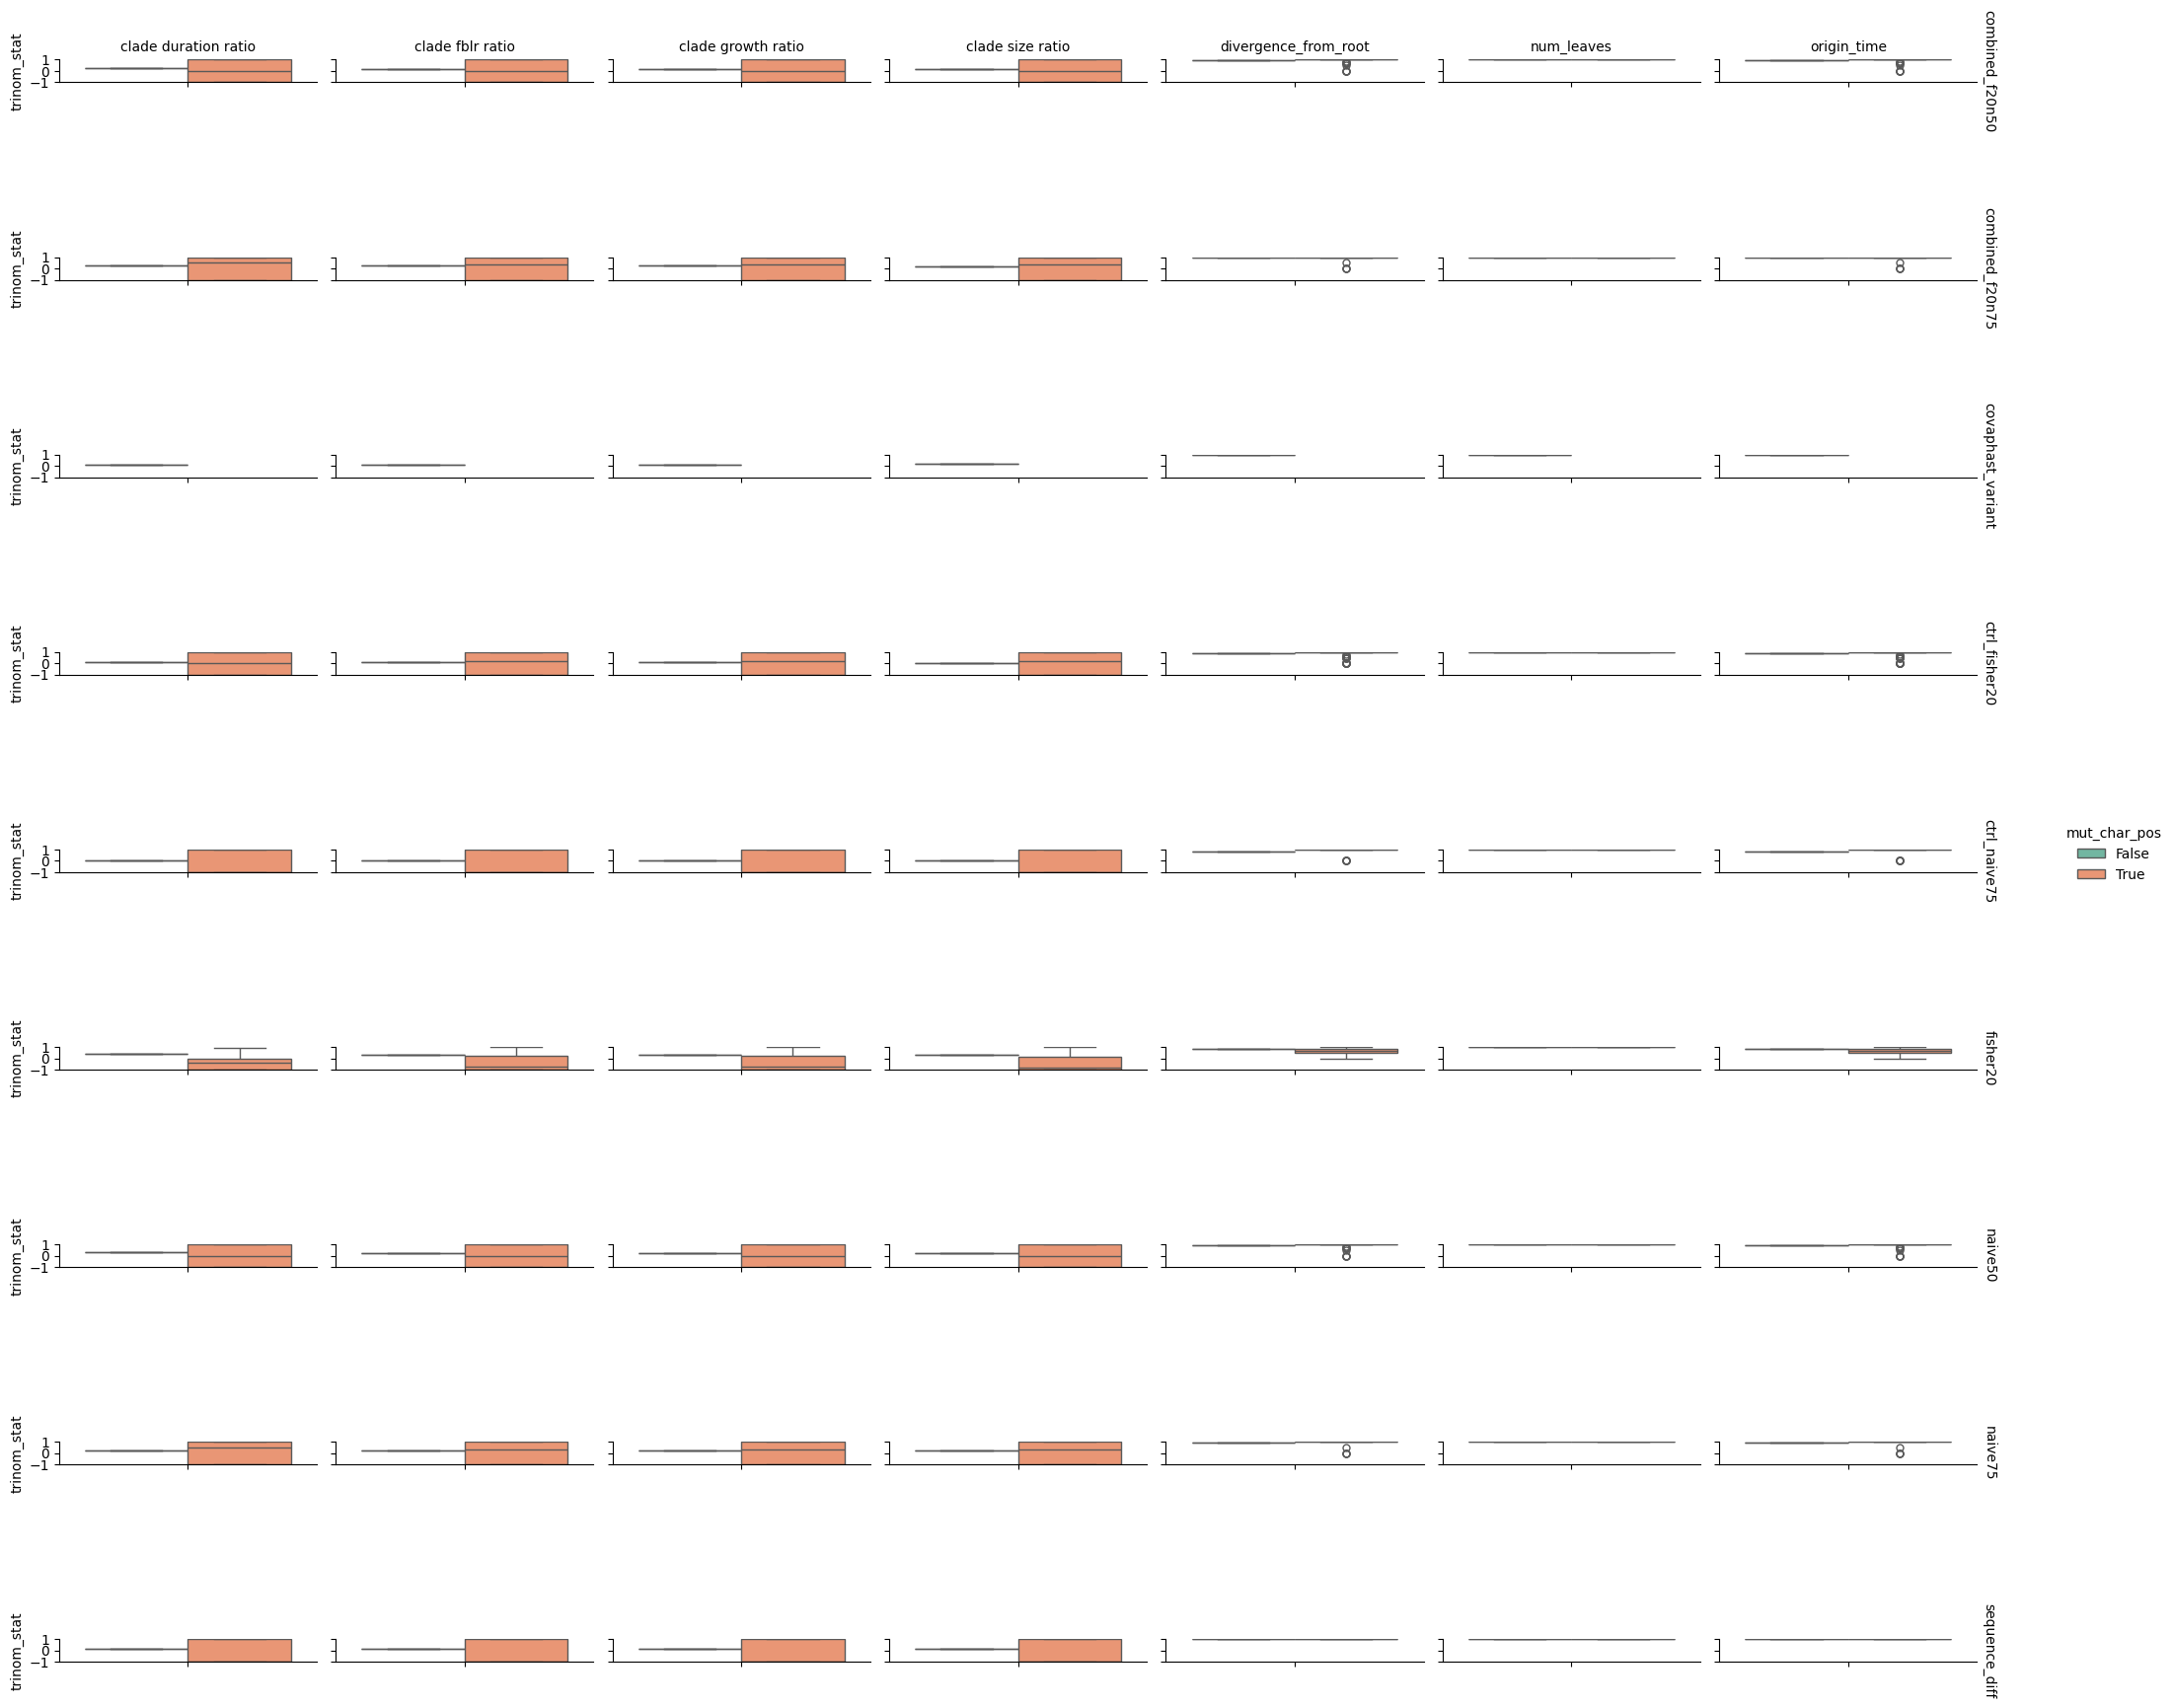

In [12]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="trinom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(-1, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=binom-stat+ext=.png


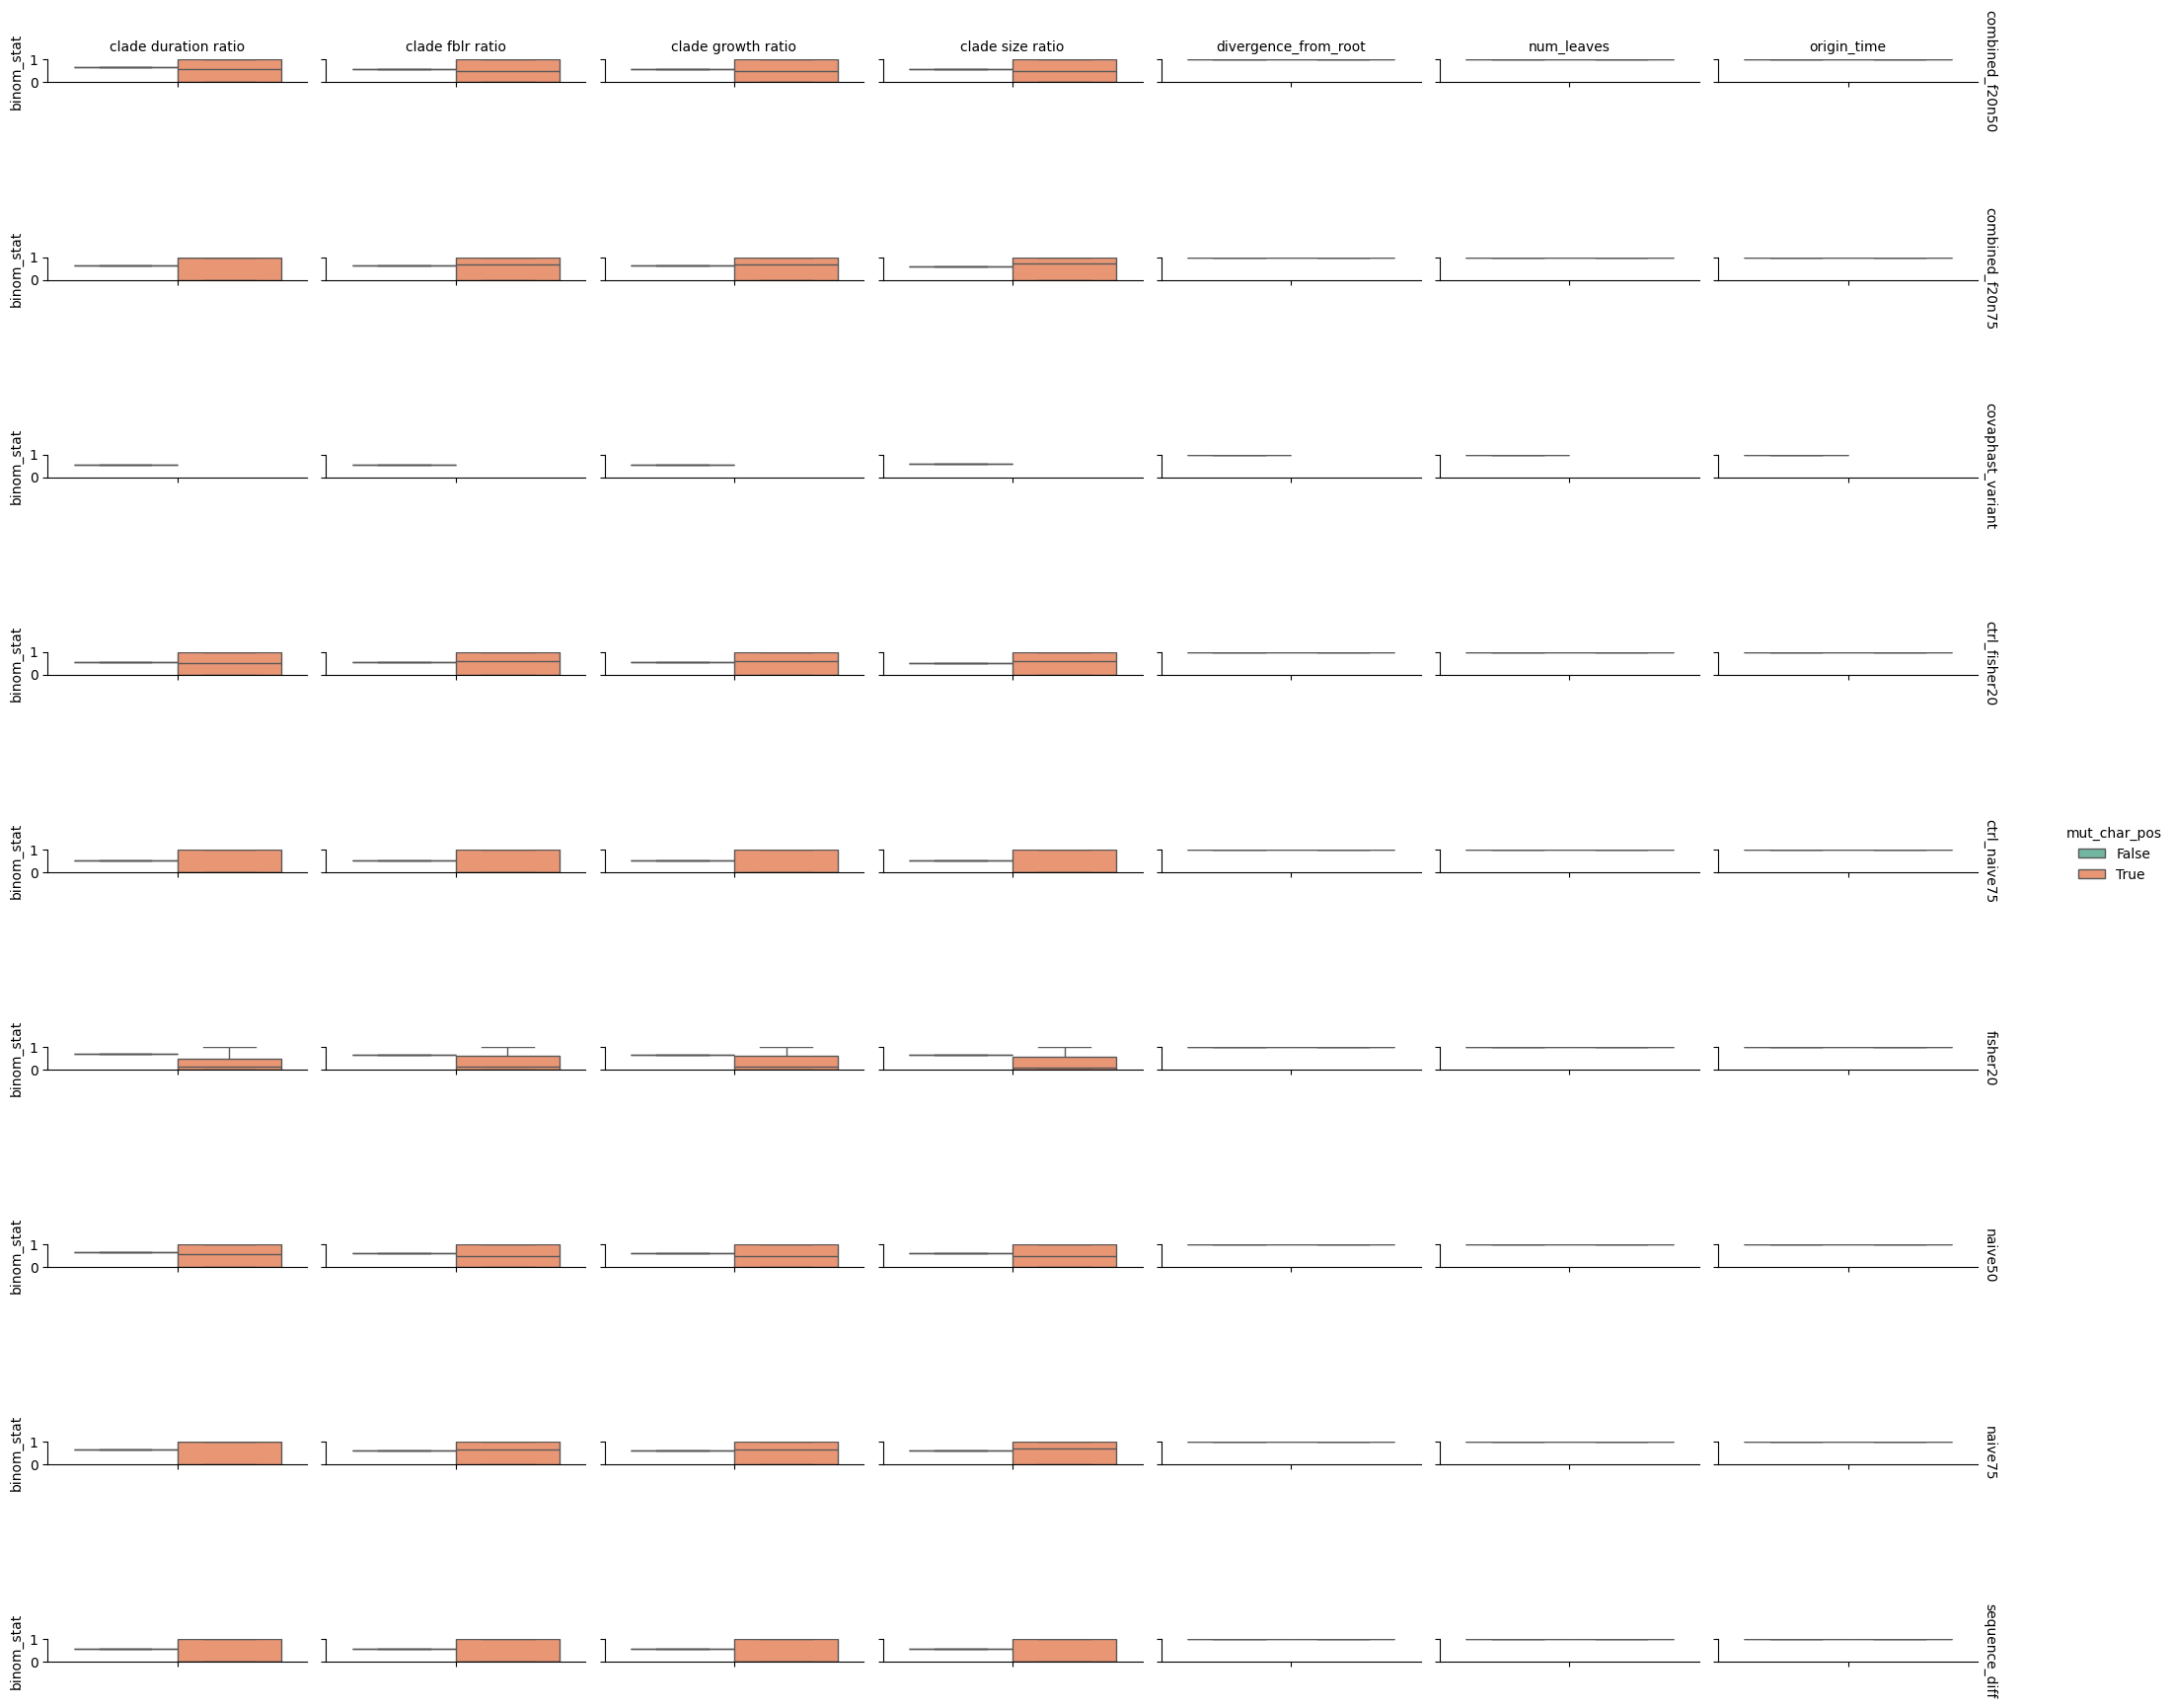

In [13]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="binom_stat",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
    teed.set(ylim=(0, 1))


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+y=screened-nanmedian+ext=.png


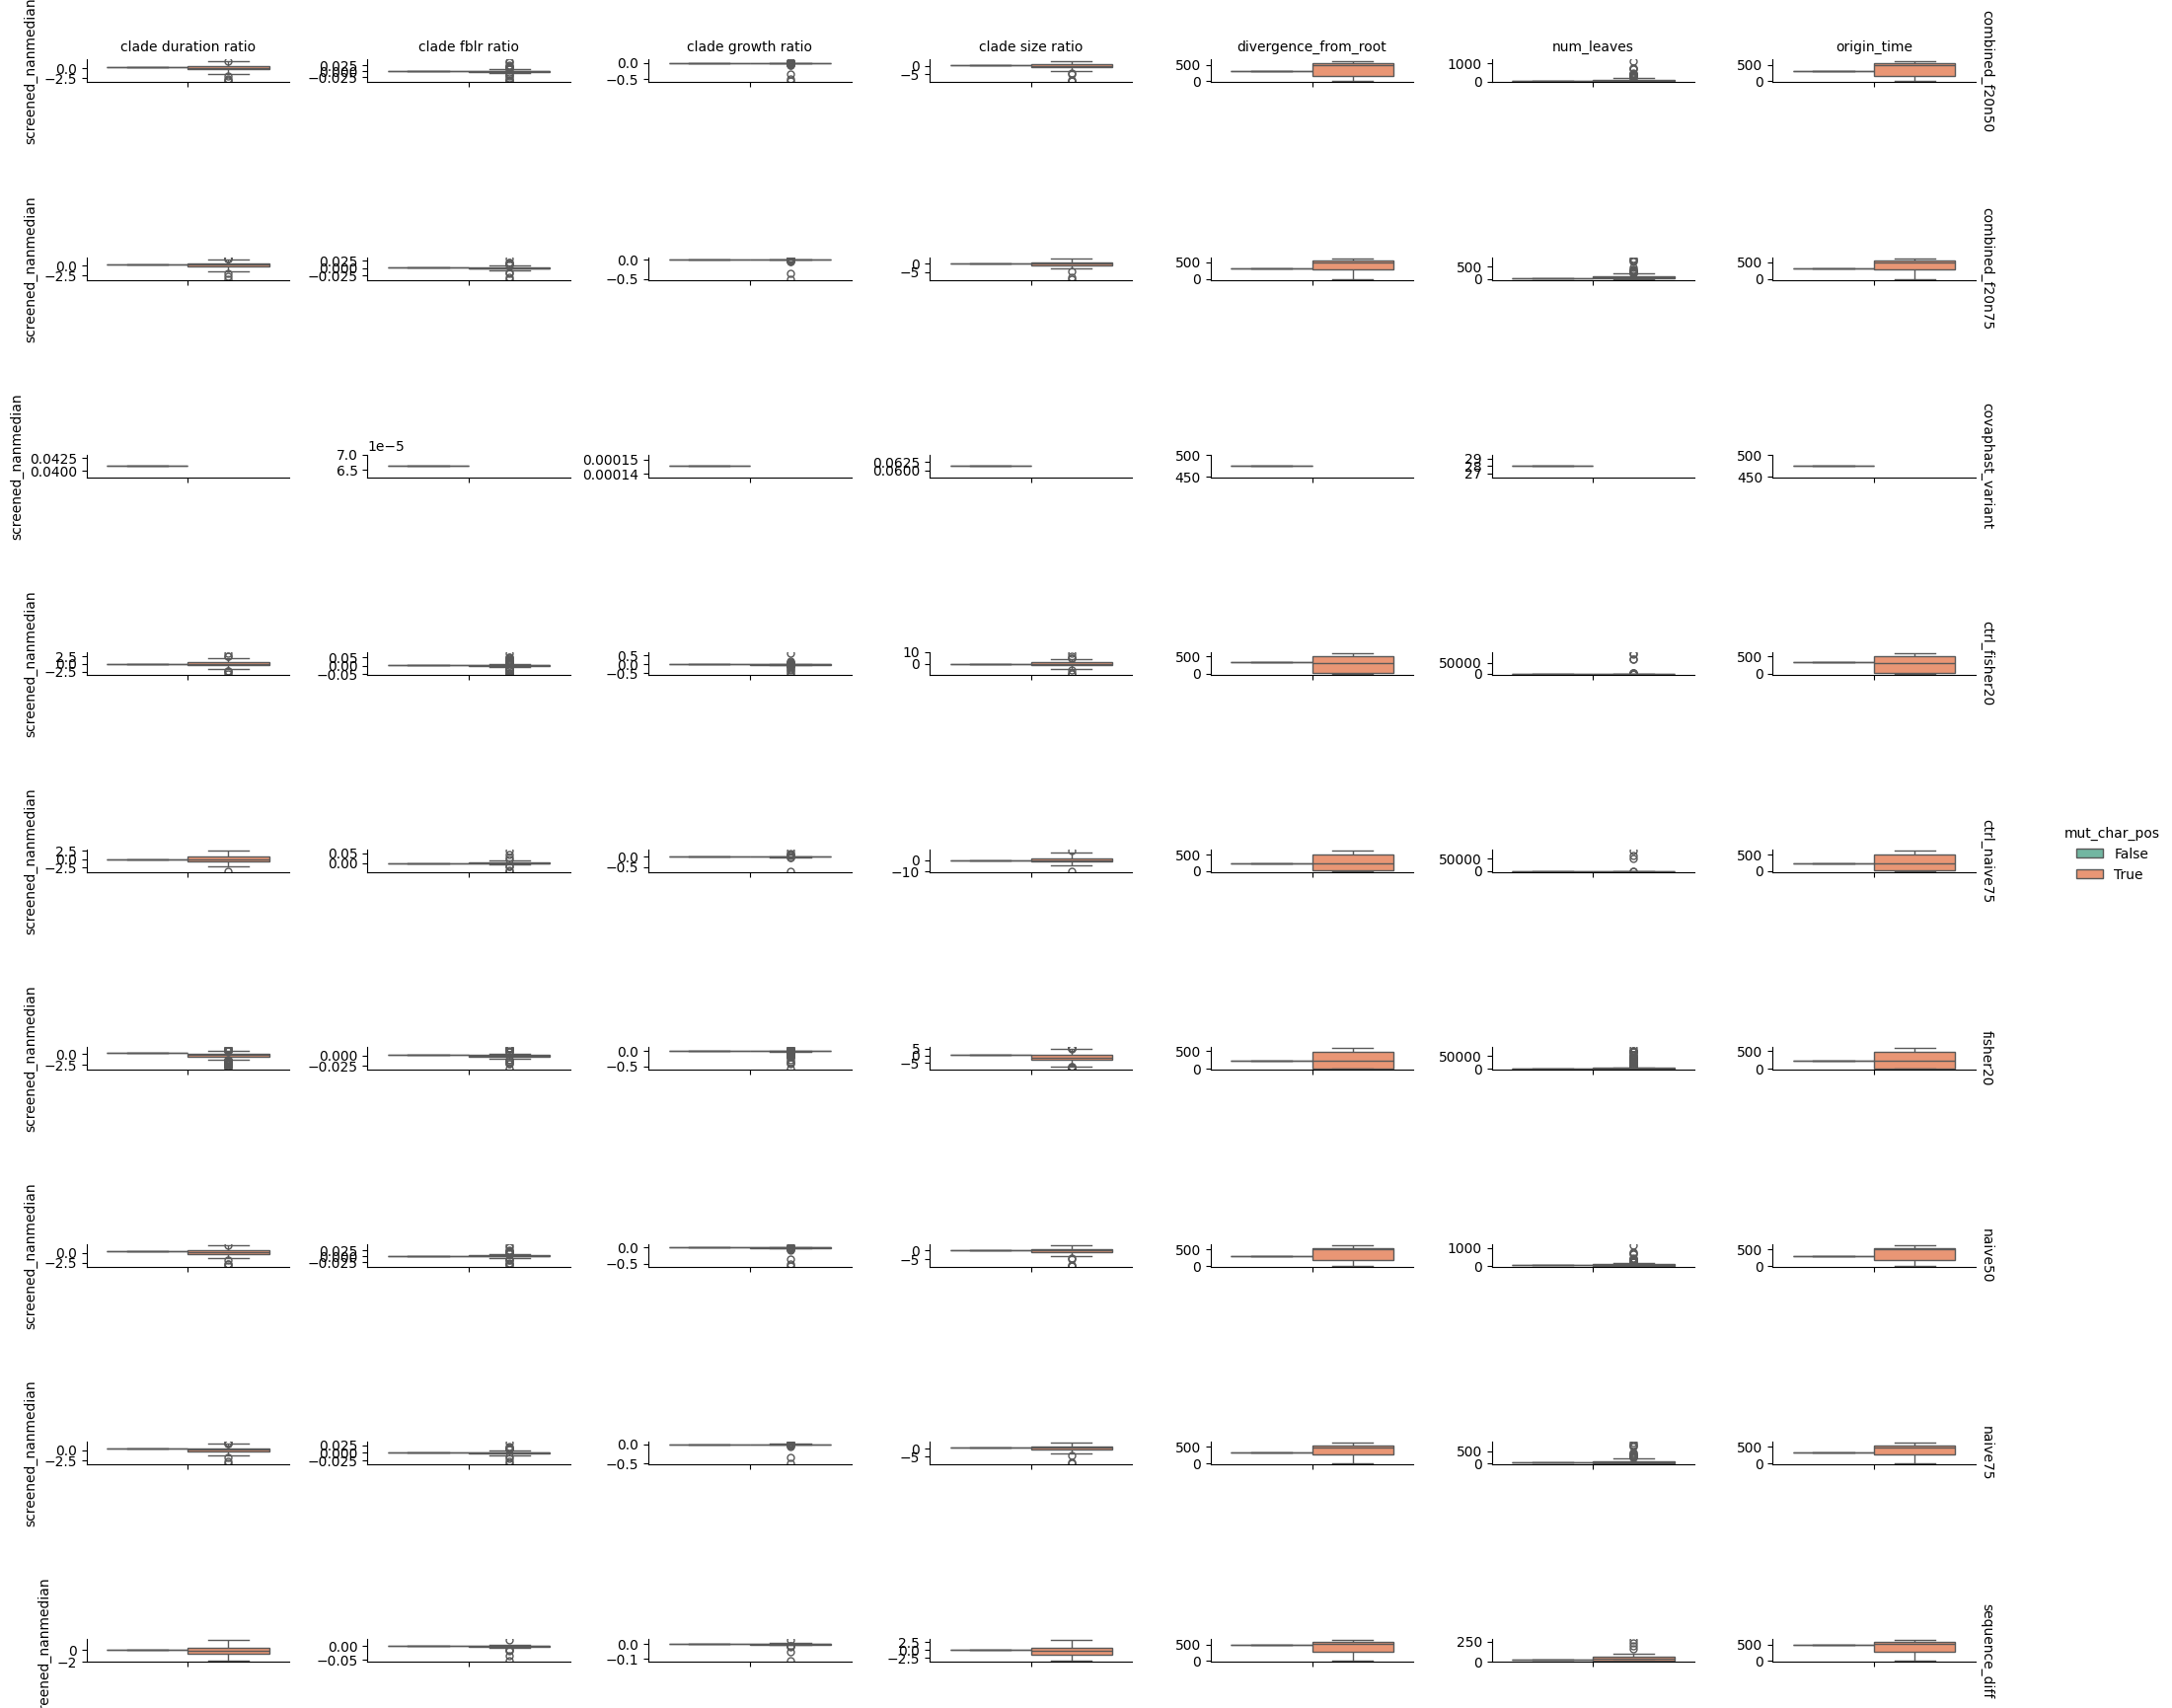

In [14]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    y="screened_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    margin_titles=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )


teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.pdf
teeplots/2025-05-03-profile-e2e/col=tb-stat+hue=mut-char-pos+kind=box+palette=set2+row=screen-name+viz=catplot+x=screen-name+y=background-nanmedian+ext=.png


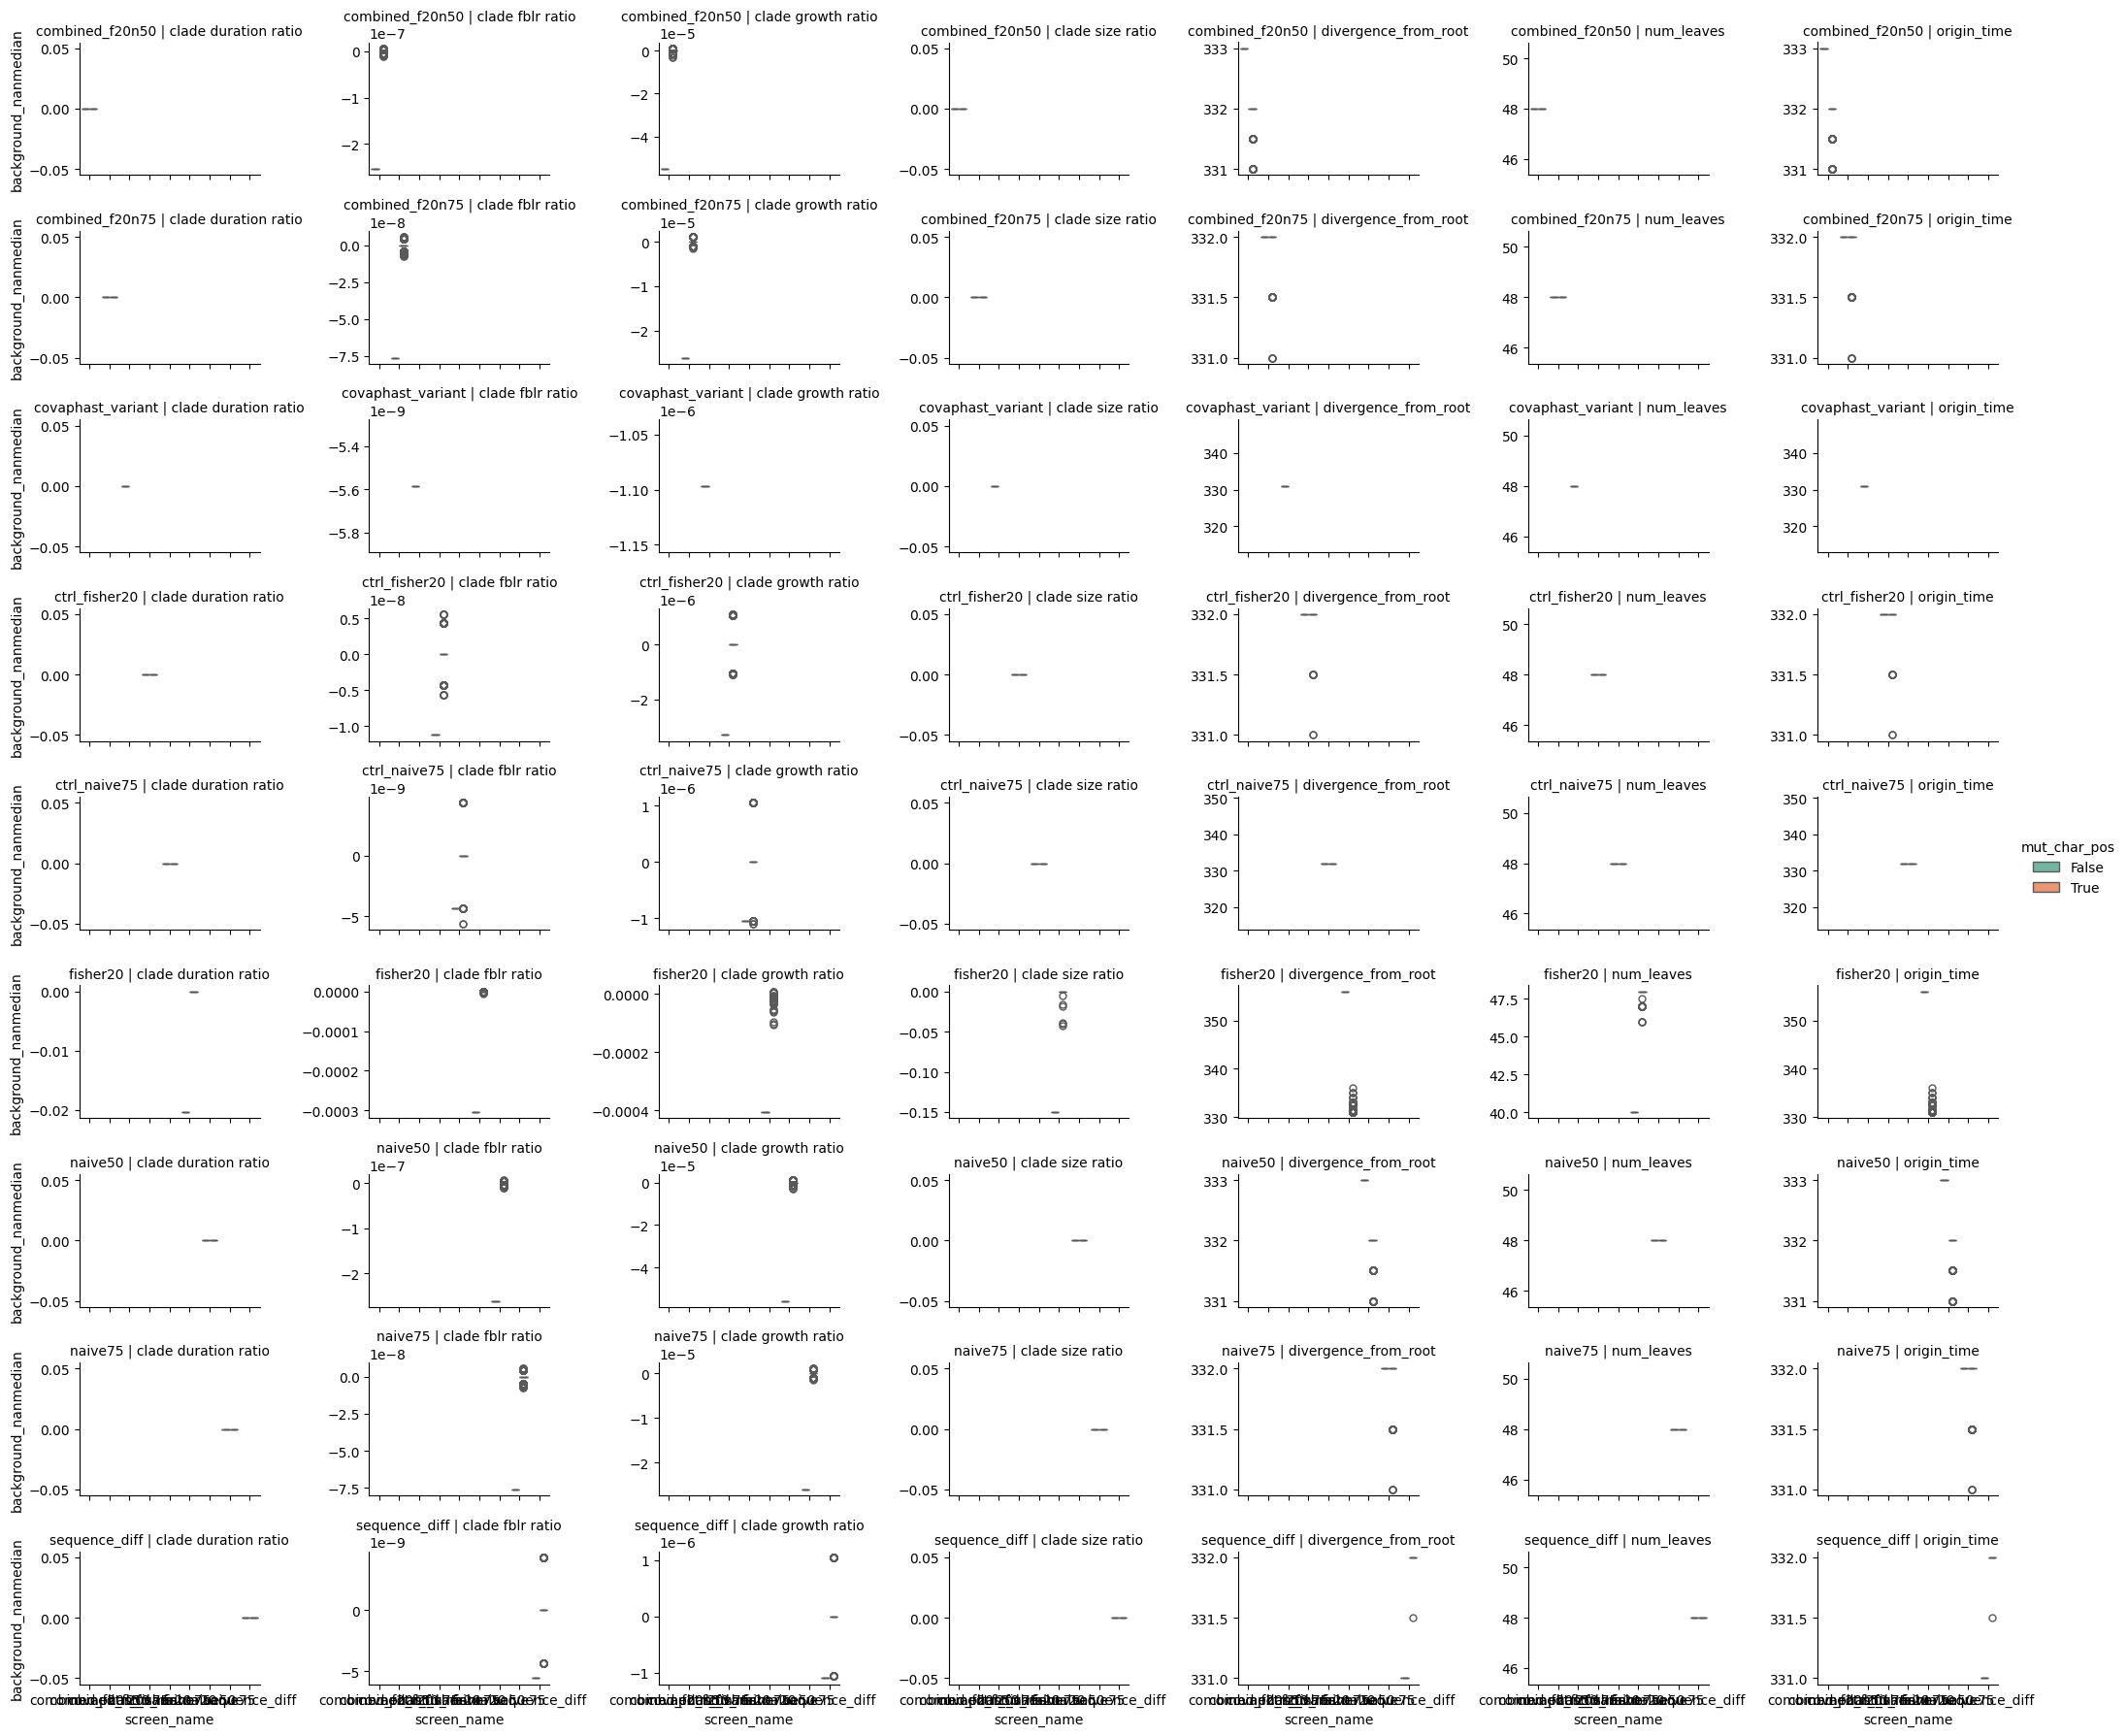

In [15]:
with tp.teed(
    sns.catplot,
    data=screen_df.astype({"mut_char_pos": bool}),
    x="screen_name",
    y="background_nanmedian",
    hue="mut_char_pos",
    col="tb_stat",
    row="screen_name",
    kind="box",
    height=2,
    aspect=1.5,
    sharey=False,
    palette="Set2",
    legend_out=True,
    teeplot_subdir=teeplot_subdir,
) as teed:
    teed.set_titles(
        row_template="{row_name}",
        col_template="{col_name}",
    )
